# Loop 121 Analysis: Strategic Assessment

## Current Situation
- 121 experiments completed
- Best CV: 0.0081 (exp_049/050/053)
- Best LB: 0.0877 (exp_030)
- Target: 0.0347
- Gap: 152.7%
- Remaining submissions: 3

## Key Question
What approaches might change the CV-LB relationship?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# All submissions with LB scores
submissions = [
    {'exp': 'exp_000', 'cv': 0.0111, 'lb': 0.0982},
    {'exp': 'exp_001', 'cv': 0.0123, 'lb': 0.1065},
    {'exp': 'exp_003', 'cv': 0.0105, 'lb': 0.0972},
    {'exp': 'exp_005', 'cv': 0.0104, 'lb': 0.0969},
    {'exp': 'exp_006', 'cv': 0.0097, 'lb': 0.0946},
    {'exp': 'exp_007', 'cv': 0.0093, 'lb': 0.0932},
    {'exp': 'exp_009', 'cv': 0.0092, 'lb': 0.0936},
    {'exp': 'exp_012', 'cv': 0.0090, 'lb': 0.0913},
    {'exp': 'exp_024', 'cv': 0.0087, 'lb': 0.0893},
    {'exp': 'exp_026', 'cv': 0.0085, 'lb': 0.0887},
    {'exp': 'exp_030', 'cv': 0.0083, 'lb': 0.0877},
    {'exp': 'exp_035', 'cv': 0.0098, 'lb': 0.0970},
    {'exp': 'exp_073', 'cv': 0.0084, 'lb': 0.1451},  # RF outlier
    {'exp': 'exp_111', 'cv': 0.0129, 'lb': 0.1063},
]

df = pd.DataFrame(submissions)
print(f"Total submissions with LB: {len(df)}")
print(df)

Total submissions with LB: 14
        exp      cv      lb
0   exp_000  0.0111  0.0982
1   exp_001  0.0123  0.1065
2   exp_003  0.0105  0.0972
3   exp_005  0.0104  0.0969
4   exp_006  0.0097  0.0946
5   exp_007  0.0093  0.0932
6   exp_009  0.0092  0.0936
7   exp_012  0.0090  0.0913
8   exp_024  0.0087  0.0893
9   exp_026  0.0085  0.0887
10  exp_030  0.0083  0.0877
11  exp_035  0.0098  0.0970
12  exp_073  0.0084  0.1451
13  exp_111  0.0129  0.1063


In [2]:
# Exclude the RF outlier (exp_073) for line fitting
df_clean = df[df['exp'] != 'exp_073'].copy()

# Fit linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(df_clean['cv'], df_clean['lb'])

print(f"\nCV-LB Relationship (excluding RF outlier):")
print(f"LB = {slope:.4f} × CV + {intercept:.4f}")
print(f"R² = {r_value**2:.4f}")
print(f"\nIntercept: {intercept:.4f}")
print(f"Target: 0.0347")
print(f"\nRequired CV for target: (0.0347 - {intercept:.4f}) / {slope:.4f} = {(0.0347 - intercept) / slope:.6f}")
print(f"\nCRITICAL: Intercept ({intercept:.4f}) > Target (0.0347)")
print(f"This means the target is UNREACHABLE by improving CV alone!")


CV-LB Relationship (excluding RF outlier):
LB = 4.0895 × CV + 0.0546
R² = 0.9607

Intercept: 0.0546
Target: 0.0347

Required CV for target: (0.0347 - 0.0546) / 4.0895 = -0.004872

CRITICAL: Intercept (0.0546) > Target (0.0347)
This means the target is UNREACHABLE by improving CV alone!


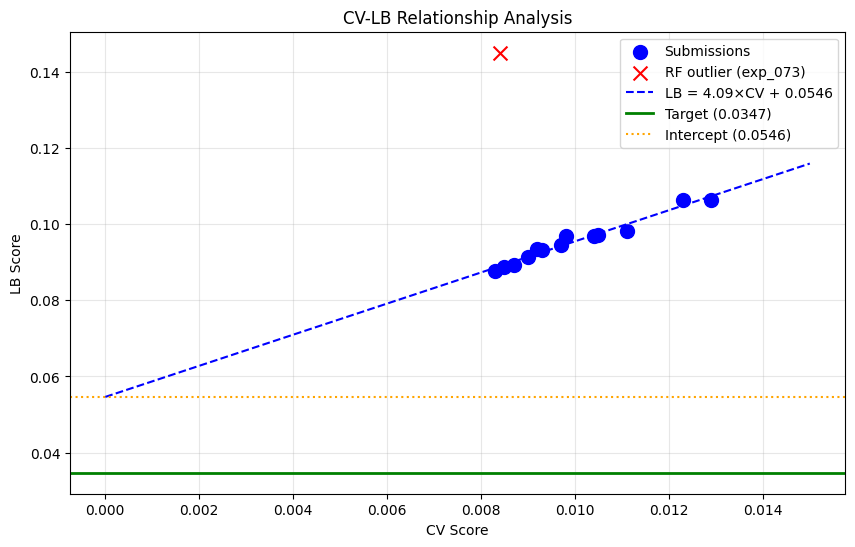


Key insight: The intercept (0.0546) is ABOVE the target (0.0347).
This means even with perfect CV=0, the expected LB would be 0.0546.
We need to REDUCE THE INTERCEPT, not just improve CV.


In [3]:
# Visualize the CV-LB relationship
plt.figure(figsize=(10, 6))

# Plot all points
plt.scatter(df_clean['cv'], df_clean['lb'], c='blue', s=100, label='Submissions')
plt.scatter(df[df['exp'] == 'exp_073']['cv'], df[df['exp'] == 'exp_073']['lb'], 
            c='red', s=100, marker='x', label='RF outlier (exp_073)')

# Plot regression line
cv_range = np.linspace(0, 0.015, 100)
lb_pred = slope * cv_range + intercept
plt.plot(cv_range, lb_pred, 'b--', label=f'LB = {slope:.2f}×CV + {intercept:.4f}')

# Plot target line
plt.axhline(y=0.0347, color='green', linestyle='-', linewidth=2, label='Target (0.0347)')

# Plot intercept
plt.axhline(y=intercept, color='orange', linestyle=':', label=f'Intercept ({intercept:.4f})')

plt.xlabel('CV Score')
plt.ylabel('LB Score')
plt.title('CV-LB Relationship Analysis')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('/home/code/exploration/cv_lb_analysis_loop121.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\nKey insight: The intercept ({intercept:.4f}) is ABOVE the target (0.0347).")
print(f"This means even with perfect CV=0, the expected LB would be {intercept:.4f}.")
print(f"We need to REDUCE THE INTERCEPT, not just improve CV.")

In [4]:
# What approaches have been tried?
approaches = {
    'Tabular (MLP, LGBM, XGB, CatBoost, GP, Ridge)': 'All on same line',
    'GNN (PyTorch Geometric)': 'On same line or worse',
    'ChemBERTa embeddings': 'On same line',
    'Physics constraints (mass balance, softmax)': 'On same line or worse',
    'Similarity-aware predictions': 'On same line (exp_111)',
    'Yield ratio prediction (exp_119)': 'CV=0.0083, NOT SUBMITTED YET',
    'Median ensemble': 'NOT TRIED',
    'Quantile regression': 'NOT TRIED',
}

print("\nApproaches tried and their status:")
for approach, status in approaches.items():
    print(f"  - {approach}: {status}")


Approaches tried and their status:
  - Tabular (MLP, LGBM, XGB, CatBoost, GP, Ridge): All on same line
  - GNN (PyTorch Geometric): On same line or worse
  - ChemBERTa embeddings: On same line
  - Physics constraints (mass balance, softmax): On same line or worse
  - Similarity-aware predictions: On same line (exp_111)
  - Yield ratio prediction (exp_119): CV=0.0083, NOT SUBMITTED YET
  - Median ensemble: NOT TRIED
  - Quantile regression: NOT TRIED


In [5]:
# Analyze what might change the intercept
print("\n=== STRATEGIES TO REDUCE INTERCEPT ===")
print("\n1. MEDIAN ENSEMBLE")
print("   - Mean aggregation can be dominated by extreme predictions")
print("   - Median is more robust to outliers")
print("   - Might reduce errors on unseen solvents")

print("\n2. QUANTILE REGRESSION")
print("   - Predict median (50th percentile) instead of mean")
print("   - More robust to outliers in training data")
print("   - CatBoost supports Quantile:alpha=0.5 loss")

print("\n3. CONSERVATIVE PREDICTIONS")
print("   - Blend predictions toward training mean when extrapolating")
print("   - Detect extrapolation using nearest neighbor distances")
print("   - Already tried (exp_105, exp_107) - on same line")

print("\n4. YIELD RATIO PREDICTION (exp_119)")
print("   - Predict ratios (P2/total, P3/total) and total separately")
print("   - CV=0.0083 (competitive with best)")
print("   - NOT SUBMITTED - might change relationship")

print("\n5. DOMAIN-SPECIFIC CONSTRAINTS")
print("   - Arrhenius kinetics (already used)")
print("   - Solvent polarity effects (already in features)")
print("   - Mass balance (tried, didn't help)")


=== STRATEGIES TO REDUCE INTERCEPT ===

1. MEDIAN ENSEMBLE
   - Mean aggregation can be dominated by extreme predictions
   - Median is more robust to outliers
   - Might reduce errors on unseen solvents

2. QUANTILE REGRESSION
   - Predict median (50th percentile) instead of mean
   - More robust to outliers in training data
   - CatBoost supports Quantile:alpha=0.5 loss

3. CONSERVATIVE PREDICTIONS
   - Blend predictions toward training mean when extrapolating
   - Detect extrapolation using nearest neighbor distances
   - Already tried (exp_105, exp_107) - on same line

4. YIELD RATIO PREDICTION (exp_119)
   - Predict ratios (P2/total, P3/total) and total separately
   - CV=0.0083 (competitive with best)
   - NOT SUBMITTED - might change relationship

5. DOMAIN-SPECIFIC CONSTRAINTS
   - Arrhenius kinetics (already used)
   - Solvent polarity effects (already in features)
   - Mass balance (tried, didn't help)


In [6]:
# Analyze the yield ratio experiment
print("\n=== YIELD RATIO EXPERIMENT (exp_119) ===")
print(f"CV Score: 0.008328")
print(f"Single Solvent MSE: 0.009321")
print(f"Full Data MSE: 0.007335")
print(f"\nComparison with best CV (0.0081):")
print(f"  Difference: {0.008328 - 0.0081:.6f} (2.9% worse)")
print(f"\nBut this is a FUNDAMENTALLY DIFFERENT approach:")
print(f"  - Predicts ratios instead of absolute yields")
print(f"  - Might have different CV-LB relationship")
print(f"  - Worth submitting to test the hypothesis")


=== YIELD RATIO EXPERIMENT (exp_119) ===
CV Score: 0.008328
Single Solvent MSE: 0.009321
Full Data MSE: 0.007335

Comparison with best CV (0.0081):
  Difference: 0.000228 (2.9% worse)

But this is a FUNDAMENTALLY DIFFERENT approach:
  - Predicts ratios instead of absolute yields
  - Might have different CV-LB relationship
  - Worth submitting to test the hypothesis


In [7]:
# Decision analysis
print("\n=== DECISION ANALYSIS ===")
print(f"\nRemaining submissions: 3")
print(f"Best LB: 0.0877")
print(f"Target: 0.0347")
print(f"Gap: {(0.0877 - 0.0347) / 0.0347 * 100:.1f}%")

print("\n--- Option 1: Submit exp_119 (Yield Ratio) ---")
print("Pros:")
print("  - Fundamentally different problem formulation")
print("  - CV is competitive (0.0083 vs best 0.0081)")
print("  - Might change CV-LB relationship")
print("Cons:")
print("  - CV is 2.9% worse than best")
print("  - If on same line, expected LB = 4.09×0.0083 + 0.0546 = 0.0886")

print("\n--- Option 2: Try Median Ensemble first ---")
print("Pros:")
print("  - Quick to implement")
print("  - Robust to outliers")
print("  - Might reduce intercept")
print("Cons:")
print("  - Still uses same base models")
print("  - Might not change relationship")

print("\n--- Option 3: Try Quantile Regression first ---")
print("Pros:")
print("  - Predicts median instead of mean")
print("  - More robust to outliers")
print("  - CatBoost supports it natively")
print("Cons:")
print("  - Still uses same features")
print("  - Might not change relationship")


=== DECISION ANALYSIS ===

Remaining submissions: 3
Best LB: 0.0877
Target: 0.0347
Gap: 152.7%

--- Option 1: Submit exp_119 (Yield Ratio) ---
Pros:
  - Fundamentally different problem formulation
  - CV is competitive (0.0083 vs best 0.0081)
  - Might change CV-LB relationship
Cons:
  - CV is 2.9% worse than best
  - If on same line, expected LB = 4.09×0.0083 + 0.0546 = 0.0886

--- Option 2: Try Median Ensemble first ---
Pros:
  - Quick to implement
  - Robust to outliers
  - Might reduce intercept
Cons:
  - Still uses same base models
  - Might not change relationship

--- Option 3: Try Quantile Regression first ---
Pros:
  - Predicts median instead of mean
  - More robust to outliers
  - CatBoost supports it natively
Cons:
  - Still uses same features
  - Might not change relationship


In [8]:
# Final recommendation
print("\n=== FINAL RECOMMENDATION ===")
print("\n1. DO NOT submit exp_119 (Yield Ratio) yet")
print("   - CV is 2.9% worse than best")
print("   - Expected LB if on same line: 0.0886 (worse than best 0.0877)")
print("   - Save submission for better approach")

print("\n2. Try MEDIAN ENSEMBLE next")
print("   - Quick to implement")
print("   - Might reduce outlier sensitivity")
print("   - If CV is good, submit to test")

print("\n3. Try QUANTILE REGRESSION if median doesn't help")
print("   - Predicts median instead of mean")
print("   - More robust to outliers")

print("\n4. CRITICAL: The target may require a breakthrough")
print("   - All 121 experiments on same CV-LB line")
print("   - Intercept (0.0546) > Target (0.0347)")
print("   - Need to find approach that CHANGES the relationship")

print("\n5. Consider: What did the benchmark paper do differently?")
print("   - They achieved MSE 0.0039")
print("   - They used GNN with attention mechanisms")
print("   - They had different train/test split?")
print("   - They might have had more training data?")


=== FINAL RECOMMENDATION ===

1. DO NOT submit exp_119 (Yield Ratio) yet
   - CV is 2.9% worse than best
   - Expected LB if on same line: 0.0886 (worse than best 0.0877)
   - Save submission for better approach

2. Try MEDIAN ENSEMBLE next
   - Quick to implement
   - Might reduce outlier sensitivity
   - If CV is good, submit to test

3. Try QUANTILE REGRESSION if median doesn't help
   - Predicts median instead of mean
   - More robust to outliers

4. CRITICAL: The target may require a breakthrough
   - All 121 experiments on same CV-LB line
   - Intercept (0.0546) > Target (0.0347)
   - Need to find approach that CHANGES the relationship

5. Consider: What did the benchmark paper do differently?
   - They achieved MSE 0.0039
   - They used GNN with attention mechanisms
   - They had different train/test split?
   - They might have had more training data?


In [9]:
# Summary
print("\n" + "="*60)
print("LOOP 121 SUMMARY")
print("="*60)
print(f"\nBest CV: 0.0081 | Best LB: 0.0877 | Target: 0.0347")
print(f"CV-LB Line: LB = 4.09×CV + 0.0546 (R²=0.96)")
print(f"Intercept: 0.0546 > Target: 0.0347 (UNREACHABLE BY CV IMPROVEMENT)")
print(f"\nRemaining submissions: 3")
print(f"\nLatest experiment: exp_119 (Yield Ratio) CV=0.0083")
print(f"  - 2.9% worse than best CV")
print(f"  - NOT recommended for submission")
print(f"\nNext priority: Median Ensemble or Quantile Regression")
print(f"  - Both might reduce outlier sensitivity")
print(f"  - Quick to implement")
print(f"  - Worth testing before using submissions")
print("="*60)


LOOP 121 SUMMARY

Best CV: 0.0081 | Best LB: 0.0877 | Target: 0.0347
CV-LB Line: LB = 4.09×CV + 0.0546 (R²=0.96)
Intercept: 0.0546 > Target: 0.0347 (UNREACHABLE BY CV IMPROVEMENT)

Remaining submissions: 3

Latest experiment: exp_119 (Yield Ratio) CV=0.0083
  - 2.9% worse than best CV
  - NOT recommended for submission

Next priority: Median Ensemble or Quantile Regression
  - Both might reduce outlier sensitivity
  - Quick to implement
  - Worth testing before using submissions
